In [ ]:
# Importing the necessary libraries
import time

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Loading the dataset
df = pd.read_csv("/content/gdrive/MyDrive/inegi_selection_final_1.csv").copy()

In [ ]:
df.head()

,folioviv,foliohog,numren,sexo,edad,hablaind,es_jefe,nivelaprob,en_pareja,inscr,num_trabaj,zona,discapacidad,asalariado,seg_meses_tot,ing_binario
0,100005002,1,1,2,91,2,1,0,2,7.0,0,200,0,2,145.238228,0
1,100005002,1,2,2,48,2,2,1,2,1.0,1,200,0,1,145.238228,1
2,100005003,1,1,1,68,2,1,1,1,1.0,1,200,0,1,312.000000,1
3,100005003,1,2,2,64,2,2,2,1,1.0,1,200,0,2,145.238228,0
4,100005004,1,1,1,56,2,1,2,1,0.0,1,200,0,2,145.238228,1


In [ ]:
df.shape

(180583, 16)

In [ ]:
X = df.loc[:, 'sexo':'seg_meses_tot']

In [ ]:
Y = df['ing_binario']

In [ ]:
Y.value_counts()

ing_binario
0    117391
1     63192
Name: count, dtype: int64

In [ ]:
from sklearn import preprocessing

categorical = ['sexo', 'zona', 'es_jefe', 'en_pareja', 'hablaind', 'nivelaprob', 'num_trabaj','discapacidad', 'inscr']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        le.fit_transform(X[feature])
        X[feature] = le.transform(X[feature])

X.head()

,sexo,edad,hablaind,es_jefe,nivelaprob,en_pareja,inscr,num_trabaj,zona,discapacidad,asalariado,seg_meses_tot
0,1,91,1,0,0,1,7,0,1,0,2,145.238228
1,1,48,1,1,1,1,1,1,1,0,1,145.238228
2,0,68,1,0,1,0,1,1,1,0,1,312.000000
3,1,64,1,1,2,0,1,1,1,0,2,145.238228
4,0,56,1,0,2,0,0,1,1,0,2,145.238228


In [ ]:
from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X.shape,Y.shape)
print(X_train_original.shape,y_train.shape)
print(X_test_original.shape,y_test.shape)

X_test_original_copy = X_test_original.copy()

(180583, 12) (180583,)
(144466, 12) (144466,)
(36117, 12) (36117,)


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# X.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_original)
X_test = scaler.transform(X_test_original)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score, confusion_matrix, f1_score
clf = DecisionTreeClassifier(random_state = 42)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.7170307611374145
Precision: 0.6094996056436771
Recall: 0.546819718531331
F1: 0.5764608371322006
AUC: 0.6781880454354237
Confusion Matrix:
[[18942  4456]
 [ 5764  6955]]


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Use the best parameters to train a new model
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_train, y_train)

# Make predictions
predictions = best_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Print evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
print(conf_matrix)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.7708558296647008
Precision: 0.7657429099648108
Recall: 0.7708558296647008
F1: 0.7636931869963925
AUC: 0.7251844008888707
Confusion Matrix:
[[20582  2816]
 [ 5460  7259]]


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
ros.fit(X_train, y_train)
X_resampled_train, y_resampled_train = ros.fit_resample(X_train, y_train)

clf.fit(X_resampled_train, y_resampled_train)

print("before oversampling")
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())
print()
print("after oversampling")
print(X_resampled_train.shape)
print(y_resampled_train.shape)
print(y_resampled_train.value_counts())


predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
print(conf_matrix)

before oversampling
(144466, 12)
(144466,)
ing_binario
0    93993
1    50473
Name: count, dtype: int64

after oversampling
(187986, 12)
(187986,)
ing_binario
0    93993
1    93993
Name: count, dtype: int64

Accuracy: 0.7078661018357006
Precision: 0.5831160864898022
Recall: 0.5979243651230443
F1: 0.5904273902410621
AUC: 0.6827770385321179
Confusion Matrix:
[[17961  5437]
 [ 5114  7605]]


In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search.fit(X_resampled_train, y_resampled_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Use the best parameters to train a new model
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_resampled_train, y_resampled_train)

# Make predictions
predictions = best_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Print evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
print(conf_matrix)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7094996815903868
Precision: 0.7113204221467003
Recall: 0.7094996815903868
F1: 0.7103475917098577
AUC: 0.6847016810484164
Confusion Matrix:
[[17983  5415]
 [ 5077  7642]]


## Under Sampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
rus.fit(X_train, y_train)
X_resampled_train, y_resampled_train = rus.fit_resample(X_train, y_train)

clf.fit(X_resampled_train, y_resampled_train)

print("before undersampling")
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())
print()
print("after undersampling")
print(X_resampled_train.shape)
print(y_resampled_train.shape)
print(y_resampled_train.value_counts())


predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print()
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
print(conf_matrix)

before undersampling
(144466, 12)
(144466,)
ing_binario
0    93993
1    50473
Name: count, dtype: int64

after undersampling
(100946, 12)
(100946,)
ing_binario
0    50473
1    50473
Name: count, dtype: int64

Accuracy: 0.6985630035717252
Precision: 0.5613529805760215
Recall: 0.658935450900228
F1: 0.606242540417375
AUC: 0.6895198666587643
Confusion Matrix:
[[16849  6549]
 [ 4338  8381]]


In [ ]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search.fit(X_resampled_train, y_resampled_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Use the best parameters to train a new model
best_clf = DecisionTreeClassifier(**best_params)
best_clf.fit(X_resampled_train, y_resampled_train)

# Make predictions
predictions = best_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
auc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

# Print evaluation metrics
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("AUC:", auc)
print("Confusion Matrix:")
print(conf_matrix)

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7495362294764238
Precision: 0.7636829019947193
Recall: 0.7495362294764238
F1: 0.7534892776486669
AUC: 0.7464977421542606
Confusion Matrix:
[[17707  5691]
 [ 3355  9364]]


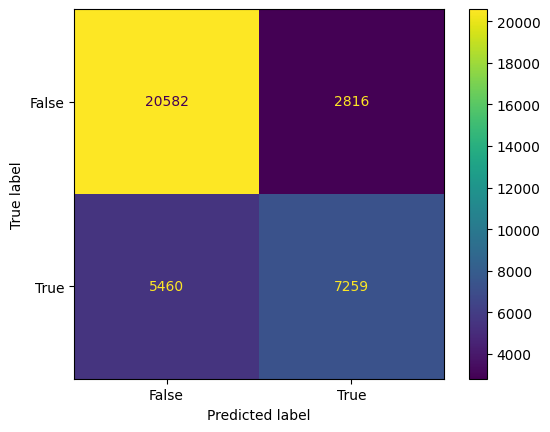

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# calcula y muestra una gráfica de la matriz de confusión para el árbol

_ = ConfusionMatrixDisplay.from_predictions(y_test, predictions,display_labels=[False, True])

### Desempeño del mejor modelo

In [ ]:
df.loc[:, 'edad'].describe(percentiles=[0.33, 0.66])

count    180583.000000
mean         44.679566
std          17.626829
min          18.000000
33%          34.000000
50%          43.000000
66%          51.000000
max         109.000000
Name: edad, dtype: float64

In [ ]:
y_pred = best_clf.predict(X_test)

In [ ]:
X_test_original_copy['edad']

145606    35
96140     40
45490     35
92705     25
66651     72
          ..
48992     30
14778     21
170480    63
51808     86
130029    67
Name: edad, Length: 36117, dtype: int64

In [ ]:
X_test_original_copy['edad'].describe()

count    36117.000000
mean        44.699421
std         17.576818
min         18.000000
25%         30.000000
50%         42.000000
75%         57.000000
max        109.000000
Name: edad, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

age_groups = [(18, 34), (34, 51), (51, float('inf'))]
results = {}

for lower, upper in age_groups:
    # Create a mask for the current age group
    mask = (X_test_original_copy['edad'] >= lower) & (X_test_original_copy['edad'] < upper)

    # Filter y_test and y_pred according to the mask
    y_test_group = y_test[mask]
    y_pred_group = y_pred[mask]

    # Calculate metrics for the current age group
    accuracy = accuracy_score(y_test_group, y_pred_group)
    report = classification_report(y_test_group, y_pred_group)

    results[f'Age {lower}-{upper}'] = {
        'accuracy': accuracy,
        'report': report
    }

# Print results
for group, metrics in results.items():
    print(f'Group: {group}')
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Report:\n{metrics['report']}")

Group: Age 18-34
Accuracy: 0.762365029606409
Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      7744
           1       0.69      0.48      0.57      3740

    accuracy                           0.76     11484
   macro avg       0.74      0.69      0.70     11484
weighted avg       0.75      0.76      0.75     11484

Group: Age 34-51
Accuracy: 0.7473063973063973
Report:
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      6732
           1       0.76      0.61      0.68      5148

    accuracy                           0.75     11880
   macro avg       0.75      0.73      0.74     11880
weighted avg       0.75      0.75      0.74     11880

Group: Age 51-inf
Accuracy: 0.8004391123657179
Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      8922
           1       0.69      0.60      0.64      3831

    accuracy        

In [ ]:
groups = [0, 1]
results = {}

for group in groups:
    # Create a mask for the current group
    mask = (X_test_original_copy['sexo'] == group)

    # Apply the mask to filter the scaled test set and corresponding y_test
    X_test_group_scaled = X_test[mask]
    y_test_group = y_test[mask]

    # Make predictions for the filtered group
    y_pred_group = best_clf.predict(X_test_group_scaled)

    # Calculate metrics for the current group
    accuracy = accuracy_score(y_test_group, y_pred_group)
    report = classification_report(y_test_group, y_pred_group)

    results[f'Sexo {group}'] = {
        'accuracy': accuracy,
        'report': report
    }

# Print results
for group, metrics in results.items():
    print(f'Group: {group}')
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Report:\n{metrics['report']}")

Group: Sexo 0
Accuracy: 0.7220936349289847
Report:
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     10678
           1       0.71      0.61      0.66      8332

    accuracy                           0.72     19010
   macro avg       0.72      0.71      0.71     19010
weighted avg       0.72      0.72      0.72     19010

Group: Sexo 1
Accuracy: 0.8250423803121529
Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     12720
           1       0.74      0.49      0.59      4387

    accuracy                           0.83     17107
   macro avg       0.79      0.72      0.74     17107
weighted avg       0.82      0.83      0.81     17107



In [ ]:
X.head()

,sexo,edad,hablaind,es_jefe,nivelaprob,en_pareja,inscr,num_trabaj,zona,discapacidad,asalariado,seg_meses_tot
0,1,91,1,0,0,1,7,0,1,0,2,145.238228
1,1,48,1,1,1,1,1,1,1,0,1,145.238228
2,0,68,1,0,1,0,1,1,1,0,1,312.000000
3,1,64,1,1,2,0,1,1,1,0,2,145.238228
4,0,56,1,0,2,0,0,1,1,0,2,145.238228


In [ ]:
groups = [0, 1]
results = {}

for group in groups:
    # Create a mask for the current group
    mask = (X_test_original_copy['hablaind'] == group)

    # Apply the mask to filter the scaled test set and corresponding y_test
    X_test_group_scaled = X_test[mask]
    y_test_group = y_test[mask]

    # Make predictions for the filtered group
    y_pred_group = best_clf.predict(X_test_group_scaled)

    # Calculate metrics for the current group
    accuracy = accuracy_score(y_test_group, y_pred_group)
    report = classification_report(y_test_group, y_pred_group)

    results[f'hablaind {group}'] = {
        'accuracy': accuracy,
        'report': report
    }

# Print results
for group, metrics in results.items():
    print(f'Group: {group}')
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Report:\n{metrics['report']}")

Group: hablaind 0
Accuracy: 0.8566295364714337
Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2349
           1       0.55      0.41      0.47       434

    accuracy                           0.86      2783
   macro avg       0.73      0.68      0.70      2783
weighted avg       0.84      0.86      0.85      2783

Group: hablaind 1
Accuracy: 0.7636947261054778
Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     21049
           1       0.73      0.58      0.64     12285

    accuracy                           0.76     33334
   macro avg       0.75      0.72      0.73     33334
weighted avg       0.76      0.76      0.76     33334



In [ ]:
Y.value_counts()

ing_binario
0    117391
1     63192
Name: count, dtype: int64

In [ ]:
best_clf.feature_importances_

array([8.34896459e-02, 4.56878692e-02, 1.38916948e-03, 7.05890083e-02,
       1.60782280e-01, 4.88372864e-03, 4.96402937e-01, 6.02886026e-02,
       1.69687525e-02, 3.35708962e-04, 3.93590534e-03, 5.52463919e-02])

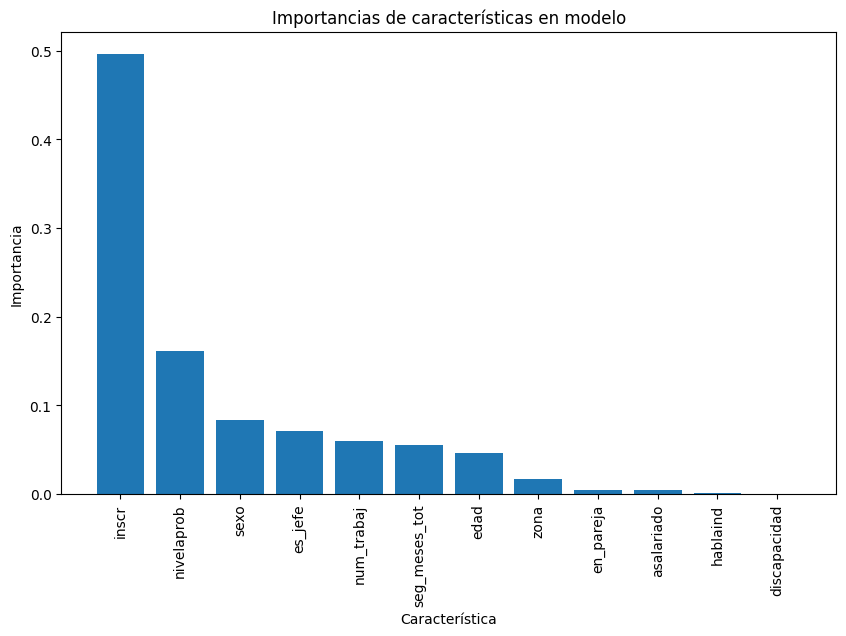

In [ ]:
# Extract feature importances
feature_importances = best_clf.feature_importances_
feature_names = X.columns

# Create a bar plot
plt.figure(figsize=(10, 6))
indices = np.argsort(feature_importances)[::-1]  # Sort features by importance

plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.title('Importancias de características en modelo')
plt.show()

In [ ]:
from sklearn.model_selection import KFold

if not isinstance(X_train, np.ndarray):
    X_train = X_train.values
if not isinstance(y_train, np.ndarray):
    y_train = y_train.values
# Initialize the DecisionTreeClassifier with the best hyperparameters
# best_clf = DecisionTreeClassifier(**best_params)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize lists to store the evaluation metrics for each fold
train_accuracies = []
val_accuracies = []

# Perform k-fold cross-validation
kf = KFold(n_splits=num_folds)

for train_index, val_index in kf.split(X_train):
    # Split the data into training and validation sets for this fold
  X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

#     # Train the model on the training fold
  best_clf.fit(X_train_fold, y_train_fold)

#     # Make predictions on the validation fold
  train_predictions = best_clf.predict(X_train_fold)
  predictions = best_clf.predict(X_val_fold)

#     # Calculate accuracy for this fold
  train_accuracy = accuracy_score(y_train_fold, train_predictions)
  train_accuracies.append(train_accuracy)
  val_accuracy = accuracy_score(y_val_fold, predictions)
  val_accuracies.append(val_accuracy)

# # Calculate the average accuracy across all folds
average_accuracy1 = np.mean(train_accuracies)
average_accuracy2 = np.mean(val_accuracies)

print("Average Accuracy Train:", average_accuracy1)
print("Average Accuracy Validation:", average_accuracy2)

Average Accuracy Train: 0.770321390940649
Average Accuracy Validation: 0.7686514652268581


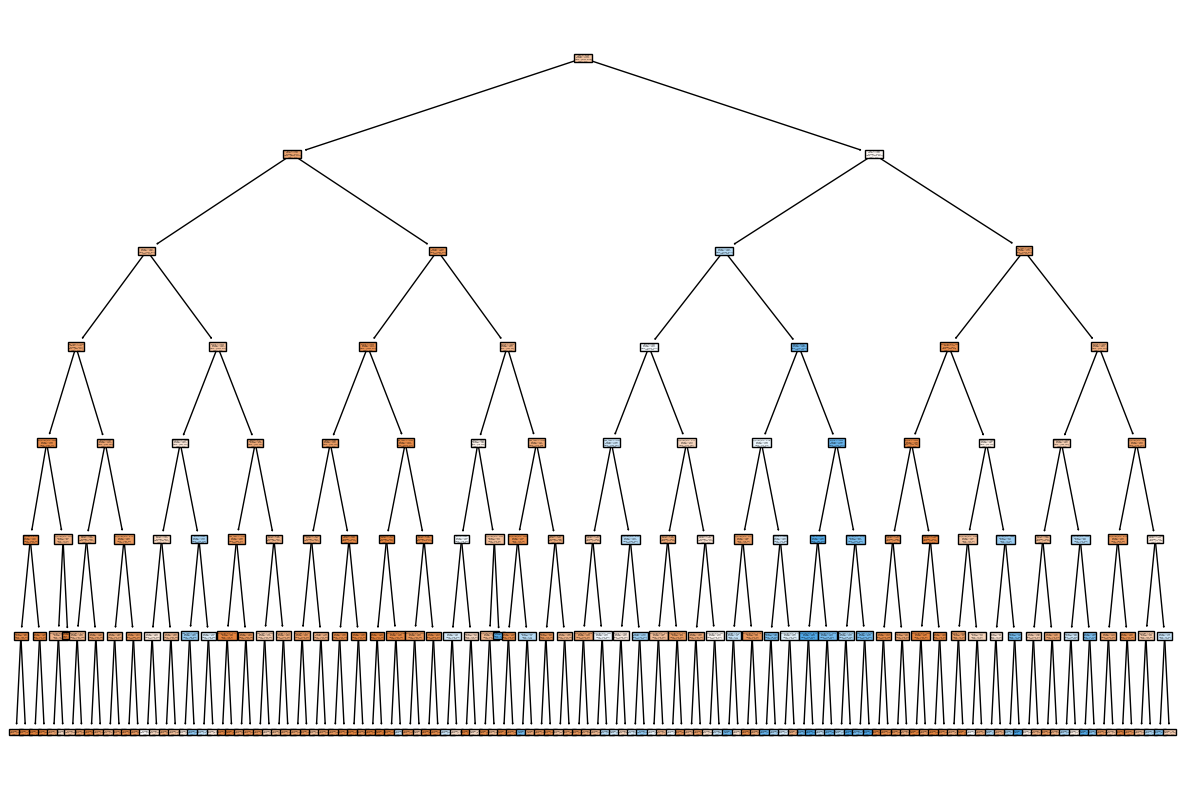

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(best_clf, filled=True, feature_names=X_test_original.columns, class_names=['+25k', '-25k'])
plt.show()